ESERCIZIO 2 "HORIZON TILING OF THE SKY"

PRIMA FACCIO I CALCOLI IN UNIVERSO CON ORIZZONTE GENERICO (modello LambdaCDM)

In [ ]:
import camb as camb
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as spi
from scipy.constants import c  #c in m/s
import sys
sys.path.append("../")

In [46]:
from pyACC.cosmology.distances import Distances

In [47]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
results = camb.get_background(pars)

In [48]:
z_values = np.linspace(0,4,100)
DA = results.angular_diameter_distance(z_values)

In [ ]:
# Conversione velocità della luce in km/s
c_km_s = c / 1000  # 299792.458 km/s  ----->usando questo nel calcolo di theta (Univ generale) viene=vengono righe non sovrapposte, anche se vanno avanti le y fino a 80 radianti!
#ma usandolo solo per univ generale....
#Sono davvero radianti?

# Conversione in Mpc/s
c_Mpc_s = c_km_s / 3.0857  # ≈ 97.8 Mpc/s



In [50]:
def hfunc_from_cosmology(z, cosmology):
    return cosmology.hubble_parameter(z)

In [51]:
# Calcolo RH(z) con pyACC
distanza = Distances(lambda z: hfunc_from_cosmology(z, results))
RH = np.array([distanza.rhubble_distance(z) for z in z_values])  
# DA(z) da CAMB, in Mpc
DA = results.angular_diameter_distance(z_values) 
# Calcolo theta 
theta = (RH*c_km_s ) / DA  


/tmp/ipykernel_68164/3693075917.py:7: RuntimeWarning: divide by zero encountered in divide
  theta = (RH*c_km_s ) / DA


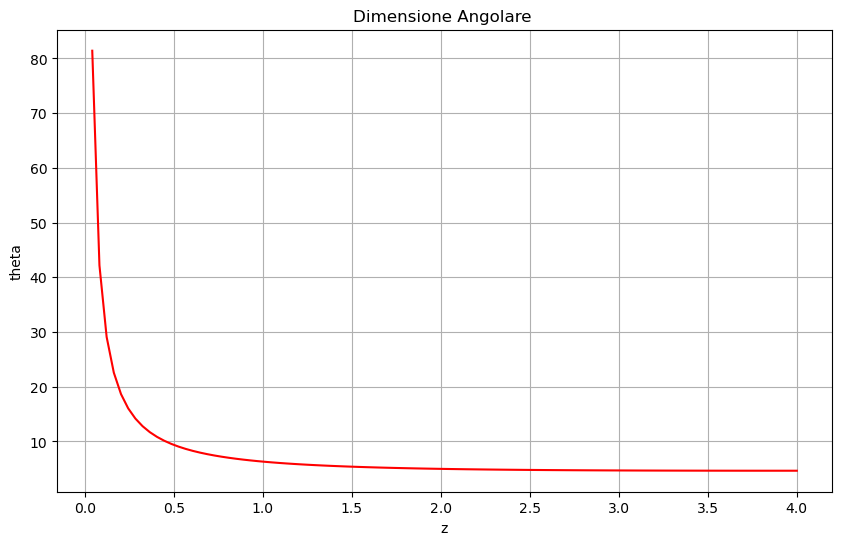

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(z_values, theta, color='red', label='theta')
plt.xlabel('z')
plt.ylabel('theta')
plt.title("Dimensione Angolare ")
plt.grid()
plt.show()

UNIVERSI DOMINATI DA MATERIA E RADIAZIONE 

PRIMO MODO: USO DIRETTAMENTE LA FORMULA DI THETA CALCOLATA A MANO

In [ ]:
z_values = np.linspace(0,4,100)

#Inserisco direttamente la formula che ho calcolato a mano
# Dimensione angolare orizzonte in un universo dominato dalla materia
theta_matter = (1 + z_values) / (np.sqrt(1 + z_values) - 1)
# Dimensione angolare orizzonte in un universo dominato dalla radiazione
theta_radiation = (1 + z_values) / z_values

/tmp/ipykernel_68164/457245166.py:6: RuntimeWarning: divide by zero encountered in divide
  theta_matter = (1 + z_values) / (np.sqrt(1 + z_values) - 1)
/tmp/ipykernel_68164/457245166.py:8: RuntimeWarning: divide by zero encountered in divide
  theta_radiation = (1 + z_values) / z_values


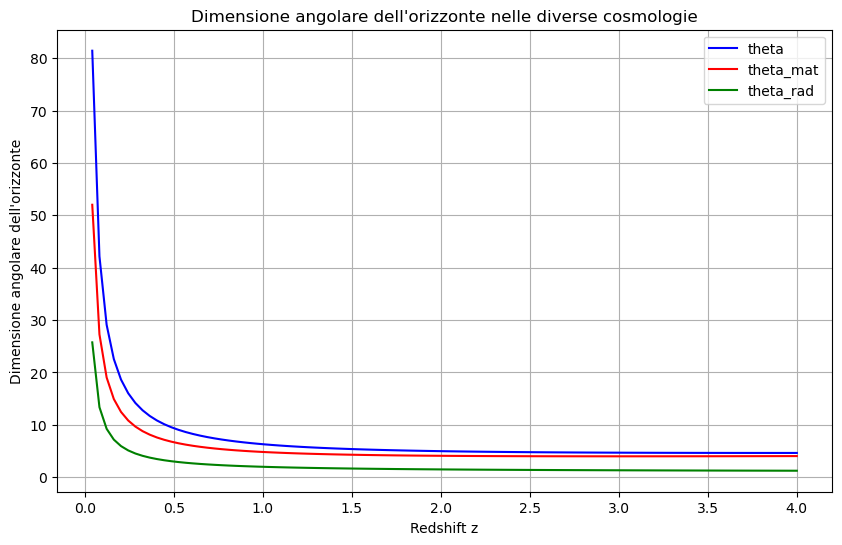

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(z_values, theta, color='blue', label='theta')
plt.plot(z_values, theta_matter, color='red', label='theta_mat')
plt.plot(z_values, theta_radiation, color='green', label='theta_rad')
plt.legend()
plt.xlabel('Redshift z')
plt.ylabel('Dimensione angolare dell\'orizzonte')
plt.title("Dimensione angolare dell'orizzonte nelle diverse cosmologie")
plt.grid()
plt.show()

Osservazioni sul grafico: la curva blu (theta generico) risulta più alta di quelle materia/radiazione dato che un universo con più componenti (materia + radiazione, come il nostro universo reale) ha un orizzonte più grande, quindi una dimensione angolare maggiore (θ più grande).

2 MODO: RIFACCIO IL CASO DI MATERIA E RADIAZIONE FACENDO FARE I CALCOLI DELL'INTEGRALE AL PROGRAMMA

/tmp/ipykernel_68164/1456152766.py:33: RuntimeWarning: divide by zero encountered in divide
  theta_matter = (RH_matter ) / DA_matter
/tmp/ipykernel_68164/1456152766.py:34: RuntimeWarning: divide by zero encountered in divide
  theta_radiation = (RH_radiation ) / DA_radiation


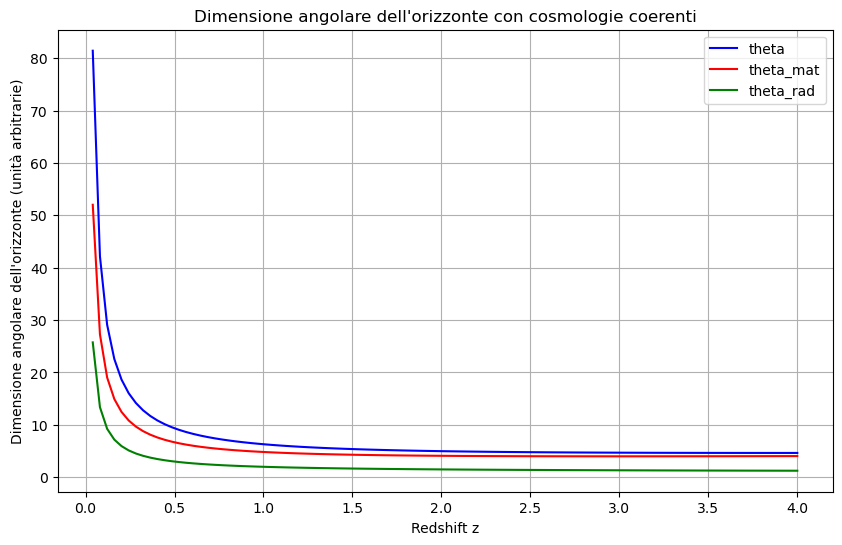

In [55]:
from scipy.integrate import quad
# Costante di Hubble arbitraria (tanto si semplifica nei confronti)
H0 = 1  

# Definizione delle funzioni di H(z), gli universi di materia e radiazione
def H_matter(z):
    return H0 * (1 + z)**1.5
def H_radiation(z):
    return H0 * (1 + z)**2

#Funzioni generiche da implementare per l'universo che si considera(dominato da materia o radiazione)
# Funzione che calcola la distanza di hubble 
def chi(z, H_func):
    integral, _ = quad(lambda zp: 1. / H_func(zp), z, np.inf)
    return integral
# Funzione che calcola la distanza comovente
def r_comov(z, H_func):
    integral, _ = quad(lambda zp: 1. / H_func(zp), 0, z)
    return integral
# Distanza angolare, che è la distanza comovente divisa per (1 + z)
def DA(z, H_func):
    return r_comov(z, H_func) / (1 + z)

# Costruiamo gli array
z_vals = np.linspace(0, 4, 100)

RH_matter = np.array([  chi(z, H_matter) for z in z_vals])
RH_radiation = np.array([ chi(z, H_radiation) for z in z_vals])

DA_matter = np.array([ DA(z, H_matter) for z in z_vals])
DA_radiation = np.array([ DA(z, H_radiation) for z in z_vals])

theta_matter = (RH_matter ) / DA_matter
theta_radiation = (RH_radiation ) / DA_radiation

# Plot
plt.figure(figsize=(10, 6))
plt.plot(z_vals, theta, label="theta", color="blue")
plt.plot(z_vals, theta_matter, label="theta_mat", color="red")
plt.plot(z_vals, theta_radiation, label="theta_rad", color="green")
plt.xlabel("Redshift z")
plt.ylabel("Dimensione angolare dell'orizzonte (unità arbitrarie)")
plt.title("Dimensione angolare dell'orizzonte con cosmologie coerenti")
plt.legend()
plt.grid(True)
plt.show()

    ORA CALCOLO IL TILING DEL CIELO, OVVERO IL NUMERO DI ORIZZONTI NECESSARI PER COPRIRE IL CIELO. QUESTO Dà UNA STIMA DEL NUMERO DI PORZIONI DEL CIELO INDIPENDENTI. 

Se Theta è in rad, l'area del cielo coperta da una patch è pi*(Theta**2). 
Considerando che l'area totale del cielo è 4*pi steradianti, ho che N=(4*pi)/pi*Theta**2.

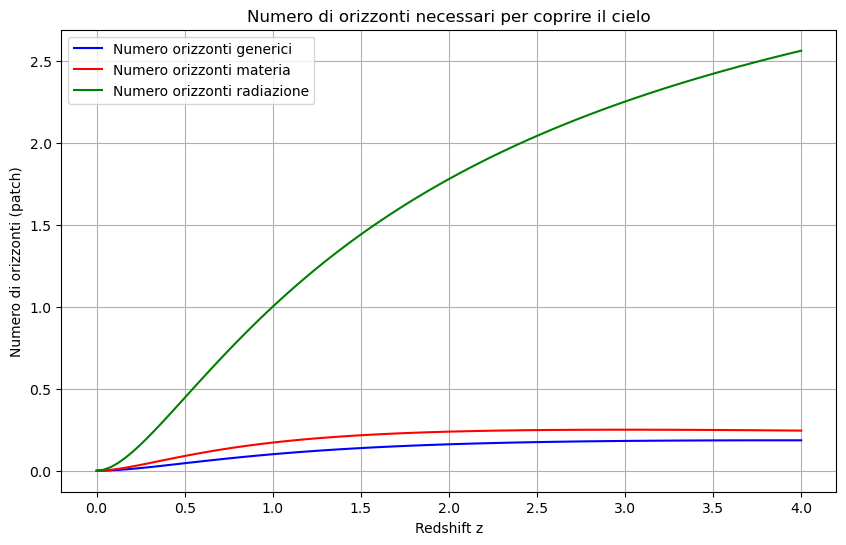

In [60]:
# Funzione per calcolare il numero di orizzonti necessari per coprire il cielo
def calculate_patches(theta):
    return 4 / (theta**2)

# Calcoliamo il numero di patch per ogni valore di theta
patches= calculate_patches(theta)
patches_mat=calculate_patches(theta_matter)
patches_rad=calculate_patches(theta_radiation)
# Grafico del numero di patch in funzione del redshift
plt.figure(figsize=(10, 6))
plt.plot(z_values, patches, label='Numero orizzonti generici', color='blue')
plt.plot(z_values,patches_mat, label='Numero orizzonti materia', color='red')
plt.plot(z_values,patches_rad, label='Numero orizzonti radiazione', color='green')
plt.xlabel('Redshift z')
plt.ylabel('Numero di orizzonti (patch)')
plt.title("Numero di orizzonti necessari per coprire il cielo")
plt.grid(True)
plt.legend()
plt.show()

ORA CALCOLO LO SCALING DELLA VARIANZA STATISTICA DI TEST

Immaginando di definire una statistica di test su ciascun a patch, ogni patch agisce come un universo indipendente. 
Ho che  la varaianza della media campionaria su tutte le patch scala come: sigma**2=1/N(z)=Theta**2.

In [65]:
# Funzione per calcolare la varianza per ciascuna patch
def calculate_patch_variance(theta):
    return theta**2

# Calcoliamo la varianza per ciascun valore di theta (ogni patch rappresenta una regione del cielo)
patch_variance = [calculate_patch_variance(theta) for theta in theta]
patch_variance_matter=[calculate_patch_variance(theta) for theta in theta_matter]
patch_variance_radiation=[calculate_patch_variance(theta) for theta in theta_radiation]

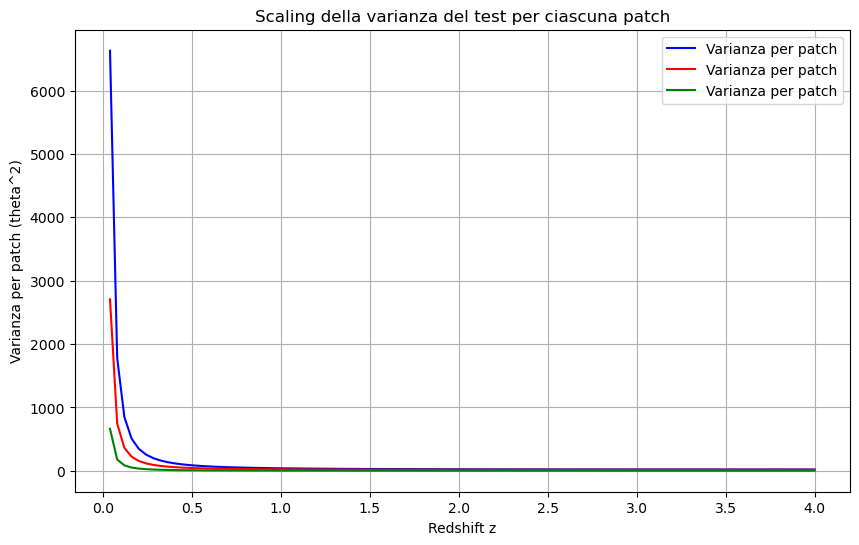

In [66]:
# Grafico della varianza in funzione di z e del numero di patch
plt.figure(figsize=(10, 6))
plt.plot(z_values, patch_variance, label='Varianza per patch', color='blue')
plt.plot(z_values, patch_variance_matter, label='Varianza per patch', color='red')
plt.plot(z_values, patch_variance_radiation, label='Varianza per patch', color='green')
plt.xlabel('Redshift z')
plt.ylabel('Varianza per patch (theta^2)')
plt.title("Scaling della varianza del test per ciascuna patch")
plt.grid(True)
plt.legend()
plt.show()